In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df= pd.read_excel(
    'result_v2.xlsx'
)

df.head(1)

,Unnamed: 0,Sr#,query,Mapped Cat,name,place_id,google_id,full_address,borough,street,...,review_link,review_rating,review_timestamp,review_datetime_utc,Yr,review_likes,sentiment_info,overall_sentiment,overall_score,aspects
0,0,2652,ChIJzzPHauEILz4RzK93NSW7XA4,عيادة طب أسنان,عيادات المسواك الطبية,ChIJzzPHauEILz4RzK93NSW7XA4,0x3e2f08e16ac733cf:0xe5cbb253577afcc,"4449 An Nasr Rd, Al Aziziyah, Riyadh 14514, Sa...",Al Aziziyah,4449 An Nasr Rd,...,NaN,4,1711941957,2024-04-01 03:25:57,2024,0,"{\n ""overall"": {\n ""Overall Sentimen...",Positive,80,"{'staff behavior': {'Sentiment': 'Positive', '..."


# Type of venues:

In [3]:
df['type'].value_counts()

type
Dental clinic        233
Medical Center        74
Elementary school     13
University             5
Primary school         5
Mosque                 3
Library                2
Laboratory             1
School                 1
Name: count, dtype: int64

# Sentiments in dataset:

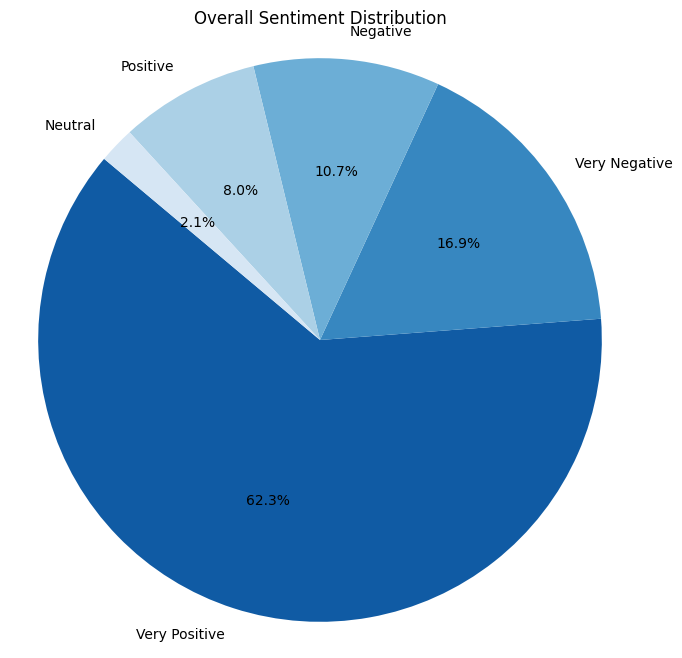

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the value counts of the 'overall_sentiment' column
value_counts = df['overall_sentiment'].value_counts()

# Define a custom blue color palette with shades of blue
colors = sns.color_palette('Blues_r', n_colors=len(value_counts))

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Overall Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


# Distribution of Sentiments with respect to venues type:

<Figure size 1200x800 with 0 Axes>

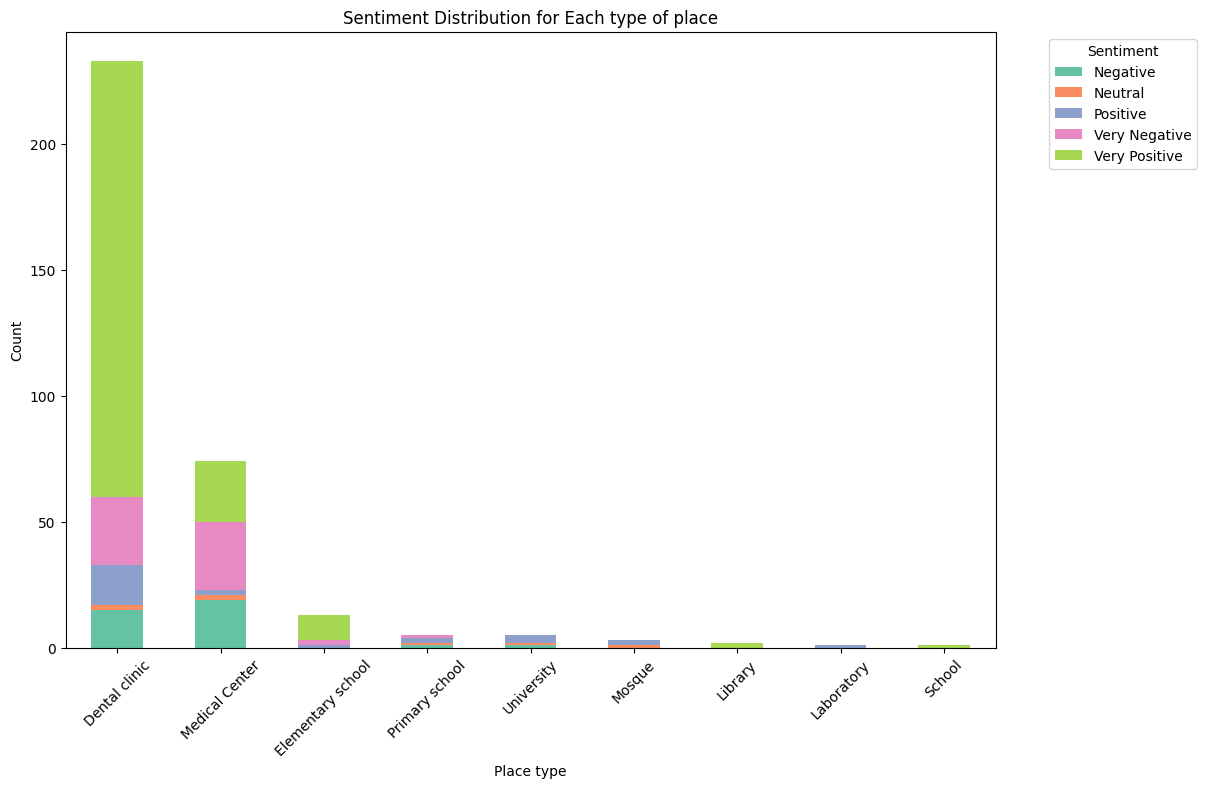

In [5]:

sentiment_counts = df.groupby(['type', 'overall_sentiment']).size().unstack(fill_value=0)
sentiment_counts['total'] = sentiment_counts.sum(axis=1)
sentiment_counts = sentiment_counts.sort_values(by='total', ascending=False)

# Define a color palette
colors = sns.color_palette('Set2', n_colors=len(sentiment_counts.columns) - 1)

plt.figure(figsize=(12, 8))
sentiment_counts.drop('total', axis=1).plot(kind='bar', stacked=True, figsize=(12, 8), color=colors)
plt.title('Sentiment Distribution for Each type of place')
plt.xlabel('Place type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


##### Detailed information about distribution of reviews w.r.t Venue type:

In [6]:
for place, row in sentiment_counts.iterrows():
    print(f"Place: {place}")
    for sentiment, count in row.items():
        if sentiment != 'total':
            print(f"{sentiment.capitalize()}: {count}")
    print()

Place: Dental clinic
Negative: 15
Neutral: 2
Positive: 16
Very negative: 27
Very positive: 173

Place: Medical Center
Negative: 19
Neutral: 2
Positive: 2
Very negative: 27
Very positive: 24

Place: Elementary school
Negative: 0
Neutral: 0
Positive: 1
Very negative: 2
Very positive: 10

Place: Primary school
Negative: 1
Neutral: 1
Positive: 2
Very negative: 1
Very positive: 0

Place: University
Negative: 1
Neutral: 1
Positive: 3
Very negative: 0
Very positive: 0

Place: Mosque
Negative: 0
Neutral: 1
Positive: 2
Very negative: 0
Very positive: 0

Place: Library
Negative: 0
Neutral: 0
Positive: 0
Very negative: 0
Very positive: 2

Place: Laboratory
Negative: 0
Neutral: 0
Positive: 1
Very negative: 0
Very positive: 0

Place: School
Negative: 0
Neutral: 0
Positive: 0
Very negative: 0
Very positive: 1



In [7]:
df.columns

Index(['Unnamed: 0', 'Sr#', 'query', 'Mapped Cat', 'name', 'place_id',
       'google_id', 'full_address', 'borough', 'street', 'postal_code',
       'area_service', 'country_code', 'country', 'city', 'us_state', 'state',
       'plus_code', 'latitude', 'longitude', 'time_zone', 'popular_times',
       'site', 'phone', 'type', 'logo', 'description', 'typical_time_spent',
       'located_in', 'located_google_id', 'category', 'subtypes', 'posts',
       'reviews_tags', 'rating', 'reviews', 'photos_count', 'cid',
       'reviews_link', 'reviews_id', 'photo', 'street_view',
       'working_hours_old_format', 'working_hours', 'other_hours',
       'business_status', 'about', 'range', 'reviews_per_score',
       'reviews_per_score_1', 'reviews_per_score_2', 'reviews_per_score_3',
       'reviews_per_score_4', 'reviews_per_score_5', 'reservation_links',
       'booking_appointment_link', 'menu_link', 'order_links', 'owner_id',
       'verified', 'owner_title', 'owner_link', 'location_link',
 

# Distribution of Sentiments w.r.t each place invloved in review:

In [8]:
df['name'].value_counts()

name
عيادات المسواك الطبية                                 233
Davinci clinics                                        74
Ziad Bin Saad Primary School                           13
جامعه الملك سعود                                        5
مدرسة 379                                               5
Abdullah Alinviei Mosque                                2
Saudi Digital Library                                   2
مسجد                                                    1
Australian Laboratory Services (ALS) Arabia Riyadh      1
روضة العلوم KACST Kindergarten                          1
Name: count, dtype: int64

<Figure size 1200x800 with 0 Axes>

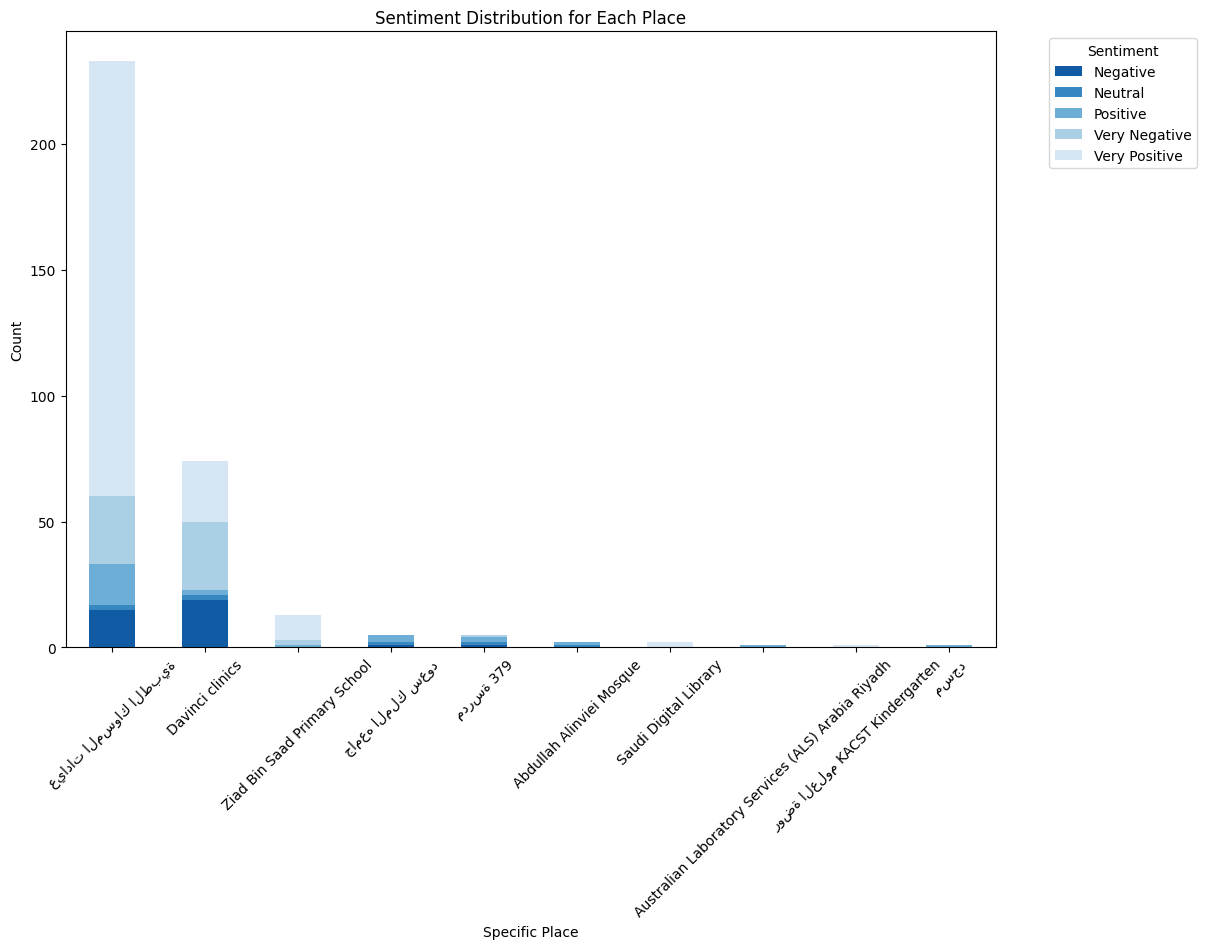

In [9]:
sentiment_counts_places = df.groupby(['name', 'overall_sentiment']).size().unstack(fill_value=0)
sentiment_counts_places['total'] = sentiment_counts_places.sum(axis=1)
sentiment_counts_places = sentiment_counts_places.sort_values(by='total', ascending=False)

# Define a custom blue color palette with shades of blue
colors = sns.color_palette('Blues_r', n_colors=len(sentiment_counts_places.columns) - 1)

# Plot the sentiment distribution for each place
plt.figure(figsize=(12, 8))
sentiment_counts_places.drop('total', axis=1).plot(kind='bar', stacked=True, figsize=(12, 8), color=colors)
plt.title('Sentiment Distribution for Each Place')
plt.xlabel('Specific Place')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Detailed inforamtion about sentiments distribution among specific places:

In [10]:
for place, row in sentiment_counts_places.iterrows():
    print(f"Place: {place}")
    for sentiment, count in row.items():
        if sentiment != 'total':
            print(f"{sentiment.capitalize()}: {count}")
    print()

Place: عيادات المسواك الطبية
Negative: 15
Neutral: 2
Positive: 16
Very negative: 27
Very positive: 173

Place: Davinci clinics
Negative: 19
Neutral: 2
Positive: 2
Very negative: 27
Very positive: 24

Place: Ziad Bin Saad Primary School
Negative: 0
Neutral: 0
Positive: 1
Very negative: 2
Very positive: 10

Place: جامعه الملك سعود
Negative: 1
Neutral: 1
Positive: 3
Very negative: 0
Very positive: 0

Place: مدرسة 379
Negative: 1
Neutral: 1
Positive: 2
Very negative: 1
Very positive: 0

Place: Abdullah Alinviei Mosque
Negative: 0
Neutral: 1
Positive: 1
Very negative: 0
Very positive: 0

Place: Saudi Digital Library
Negative: 0
Neutral: 0
Positive: 0
Very negative: 0
Very positive: 2

Place: Australian Laboratory Services (ALS) Arabia Riyadh
Negative: 0
Neutral: 0
Positive: 1
Very negative: 0
Very positive: 0

Place: روضة العلوم KACST Kindergarten
Negative: 0
Neutral: 0
Positive: 0
Very negative: 0
Very positive: 1

Place: مسجد
Negative: 0
Neutral: 0
Positive: 1
Very negative: 0
Very positi

# Disrtibution of sentiments over the rating:

In [11]:
df['rating'].value_counts()

rating
3.7    248
3.9     74
4.4      6
3.3      5
4.0      3
4.8      1
Name: count, dtype: int64

<Figure size 1200x800 with 0 Axes>

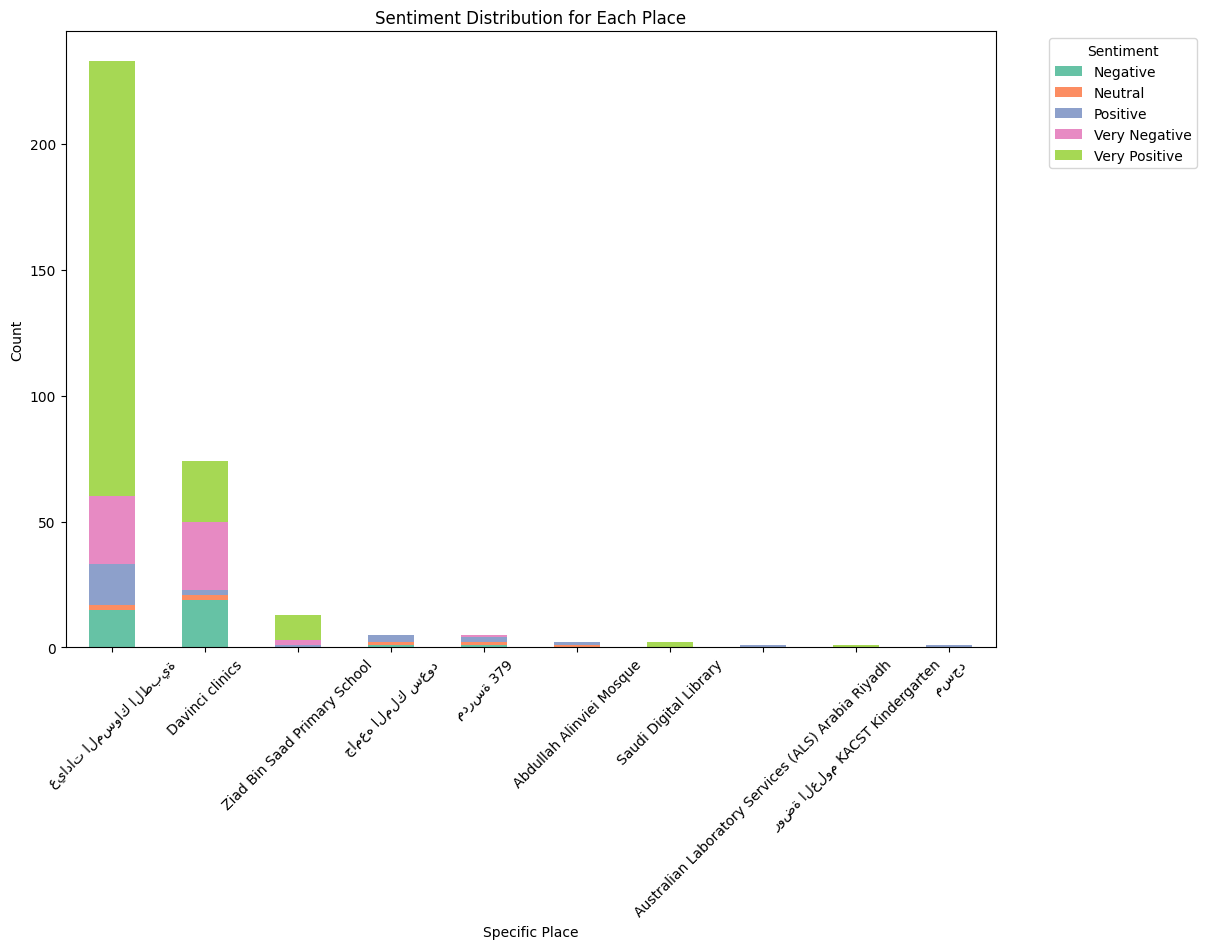

In [12]:

sentiment_counts_places = df.groupby(['name', 'overall_sentiment']).size().unstack(fill_value=0)
sentiment_counts_places['total'] = sentiment_counts_places.sum(axis=1)
sentiment_counts_places = sentiment_counts_places.sort_values(by='total', ascending=False)

# Define a color palette
colors = sns.color_palette('Set2', n_colors=len(sentiment_counts_places.columns) - 1)

plt.figure(figsize=(12, 8))
sentiment_counts_places.drop('total', axis=1).plot(kind='bar', stacked=True, figsize=(12, 8), color=colors)
plt.title('Sentiment Distribution for Each Place')
plt.xlabel('Specific Place')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [13]:
df.columns

Index(['Unnamed: 0', 'Sr#', 'query', 'Mapped Cat', 'name', 'place_id',
       'google_id', 'full_address', 'borough', 'street', 'postal_code',
       'area_service', 'country_code', 'country', 'city', 'us_state', 'state',
       'plus_code', 'latitude', 'longitude', 'time_zone', 'popular_times',
       'site', 'phone', 'type', 'logo', 'description', 'typical_time_spent',
       'located_in', 'located_google_id', 'category', 'subtypes', 'posts',
       'reviews_tags', 'rating', 'reviews', 'photos_count', 'cid',
       'reviews_link', 'reviews_id', 'photo', 'street_view',
       'working_hours_old_format', 'working_hours', 'other_hours',
       'business_status', 'about', 'range', 'reviews_per_score',
       'reviews_per_score_1', 'reviews_per_score_2', 'reviews_per_score_3',
       'reviews_per_score_4', 'reviews_per_score_5', 'reservation_links',
       'booking_appointment_link', 'menu_link', 'order_links', 'owner_id',
       'verified', 'owner_title', 'owner_link', 'location_link',
 

# How time in a day is connected to sentiments:

In [14]:
date= df['review_datetime_utc']

https://www.timeanddate.com/worldclock/saudi-arabia/riyadh

Time info taken from above link, that has sauidi timezone information and according to it:

             if 5 <= hour < 12:
                return 'Morning'
            elif 12 <= hour < 18:
                return 'Afternoon'
            elif 18 <= hour < 20:
                return 'Evening'
            else:
                return 'Night'

<Figure size 1200x800 with 0 Axes>

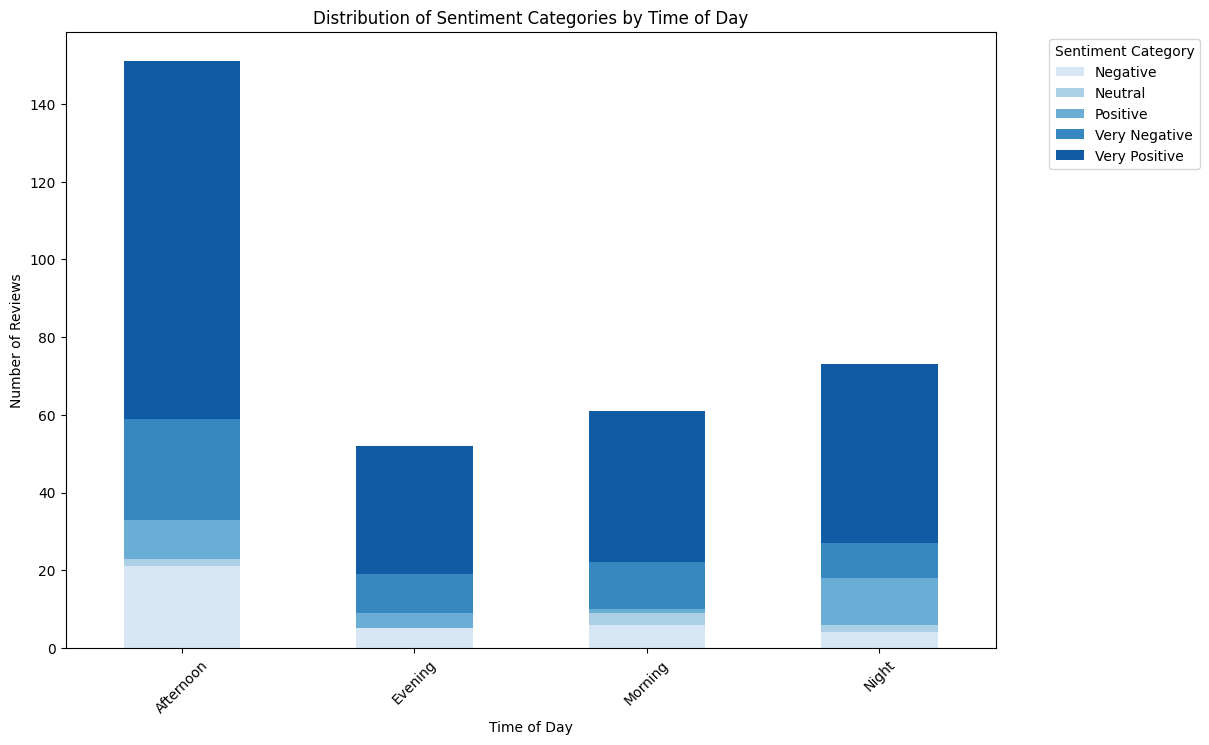

In [15]:
df['hour'] = date.dt.hour

# Function for categorizing the hour into specific parts of the day
def categorize_hour(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 20:
        return 'Evening'
    else:
        return 'Night'

df['time_of_day'] = df['hour'].apply(categorize_hour)

# Group the data by time of day and sentiment category
grouped_data = df.groupby(['time_of_day', 'overall_sentiment']).size().unstack(fill_value=0)

# Define a color palette with shades of blue
colors = sns.color_palette('Blues', n_colors=len(grouped_data.columns))

# Plot the distribution using the defined color palette
plt.figure(figsize=(12, 8))
grouped_data.plot(kind='bar', stacked=True, figsize=(12, 8), color=colors)
plt.title('Distribution of Sentiment Categories by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.legend(title='Sentiment Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Key aspects of top two places:

Basically most of the reviews are related to top two places so what we can do is that we can check out that what are the aspects people are liking or disliking about those two places.

In [16]:
df['name'].value_counts()

name
عيادات المسواك الطبية                                 233
Davinci clinics                                        74
Ziad Bin Saad Primary School                           13
جامعه الملك سعود                                        5
مدرسة 379                                               5
Abdullah Alinviei Mosque                                2
Saudi Digital Library                                   2
مسجد                                                    1
Australian Laboratory Services (ALS) Arabia Riyadh      1
روضة العلوم KACST Kindergarten                          1
Name: count, dtype: int64

In [17]:
top_two_places = df[(df['name'] == 'عيادات المسواك الطبية') | (df['name'] == 'Davinci clinics')]

top_two_places['name'].value_counts()

name
عيادات المسواك الطبية    233
Davinci clinics           74
Name: count, dtype: int64

# Top 10 Positive Aspects of all location:

In [18]:
poitive_sentiments= df[(df['overall_sentiment'] == 'Very Positive') | (df['overall_sentiment'] == 'Positive' )]

In [19]:
import json
poitive_sentiments.loc[:, 'sentiment_info_json'] = poitive_sentiments['sentiment_info'].apply(lambda x: json.loads(x))


sentiment_info_df= poitive_sentiments['sentiment_info_json']


C:\Users\DELL\AppData\Local\Temp\ipykernel_15544\284290153.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poitive_sentiments.loc[:, 'sentiment_info_json'] = poitive_sentiments['sentiment_info'].apply(lambda x: json.loads(x))


In [20]:
from collections import Counter
aspect_counts = Counter()
for info in sentiment_info_df:
    aspects = info['aspects']
    for aspect in aspects:
        aspect_counts[aspect] += 1

# Get the top 10 most common aspects
top_10_aspects_overall = aspect_counts.most_common(10)

# Print the top 10 aspects and their counts
for aspect, count in top_10_aspects_overall:
    print(f"Aspect: {aspect}, Count: {count}")


Aspect: staff behavior, Count: 158
Aspect: treatment effectiveness, Count: 100
Aspect: doctor, Count: 23
Aspect: doctor's skill, Count: 17
Aspect: professionalism, Count: 16
Aspect: cleanliness, Count: 15
Aspect: teaching staff, Count: 11
Aspect: waiting time, Count: 9
Aspect: service quality, Count: 8
Aspect: doctor's behavior, Count: 6


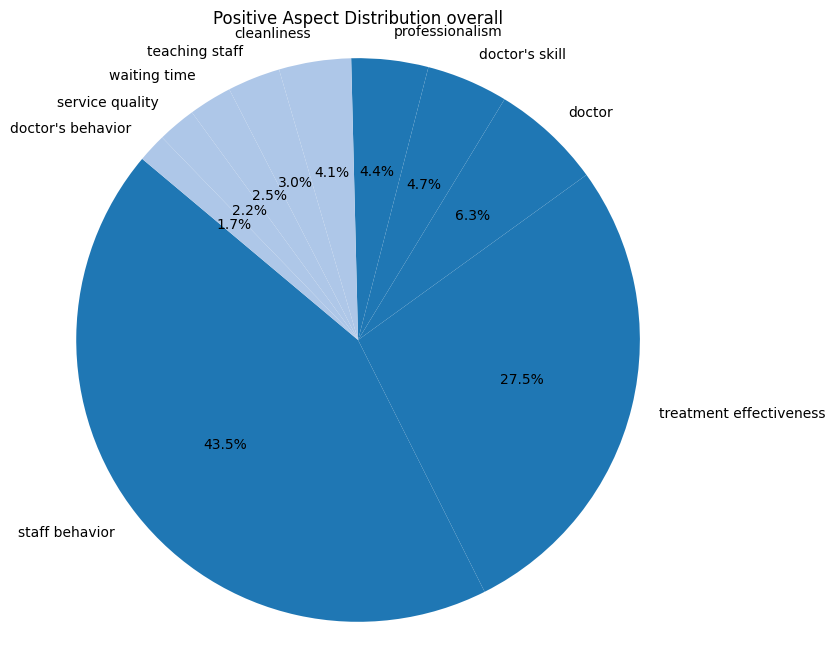

ValueError: Image size of 78942x3377 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

In [21]:


# Create a DataFrame from the top 10 aspects
df_overall = pd.DataFrame(top_10_aspects_overall, columns=['Aspect', 'Count'])

# Define a custom color palette
colors = sns.color_palette(['#1f77b4'] + ['#1f77b4']*4 + ['#aec7e8']*5)

# Horizontal bar chart
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(df_overall['Count'], labels=df_overall['Aspect'], colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Positive Aspect Distribution overall')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

# Add counts on the right side of each bar
for index, value in enumerate(df_overall['Count']):
    plt.text(value + 1, index, str(value), ha='left', va='center')

plt.show()


In [23]:
import plotly.express as px
import pandas as pd

# Assuming your original DataFrame is named df
# Extracting aspects from 'aspects' column
# Convert JSON-like strings into dictionaries
df['aspects_dict'] = df['aspects'].apply(lambda x: eval(x))

# Flatten aspects into a list of (aspect, sentiment) tuples
aspect_list = []
for idx, row in df.iterrows():
    aspects = row['aspects_dict']
    for aspect, data in aspects.items():
        aspect_list.append({
            'Aspect': aspect,
            'Sentiment': data['Sentiment']
        })

# Create a DataFrame from the aspect list
df_aspects = pd.DataFrame(aspect_list)

# Get a summary count of aspects
df_summary = df_aspects['Aspect'].value_counts().reset_index()
df_summary.columns = ['Aspect', 'Count']

# Create a pie chart
fig = px.pie(
    df_summary,
    values='Count',
    names='Aspect',
    title='Aspect Distribution',
    color_discrete_sequence=['#1f77b4', '#aec7e8'],  # Customize color palette
    hole=0.3,  # Creates a donut chart
    start_angle=140
)

# Show the plot
fig.show()


TypeError: pie() got an unexpected keyword argument 'start_angle'

### Overall Negative Aspects:

In [55]:
negative_sentiments= df[(df['overall_sentiment'] == 'Very Negative') | (df['overall_sentiment'] == 'Negative' )]

negative_sentiments.loc[:, 'sentiment_info_json'] = negative_sentiments['sentiment_info'].apply(lambda x: json.loads(x))


negative_sentiment_info_df= negative_sentiments['sentiment_info_json']


C:\Users\DELL\AppData\Local\Temp\ipykernel_19660\2081584725.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_sentiments.loc[:, 'sentiment_info_json'] = negative_sentiments['sentiment_info'].apply(lambda x: json.loads(x))


In [53]:
import seaborn as sns

Aspect: staff behavior, Count: 49
Aspect: waiting time, Count: 19
Aspect: treatment effectiveness, Count: 19
Aspect: communication, Count: 17
Aspect: customer service, Count: 13
Aspect: cost, Count: 11
Aspect: appointment scheduling, Count: 10
Aspect: management responsiveness, Count: 5
Aspect: management, Count: 4
Aspect: teaching staff, Count: 4


C:\Users\DELL\AppData\Local\Temp\ipykernel_19660\2076894104.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Aspect', data=df_negative_overall, palette=colors)


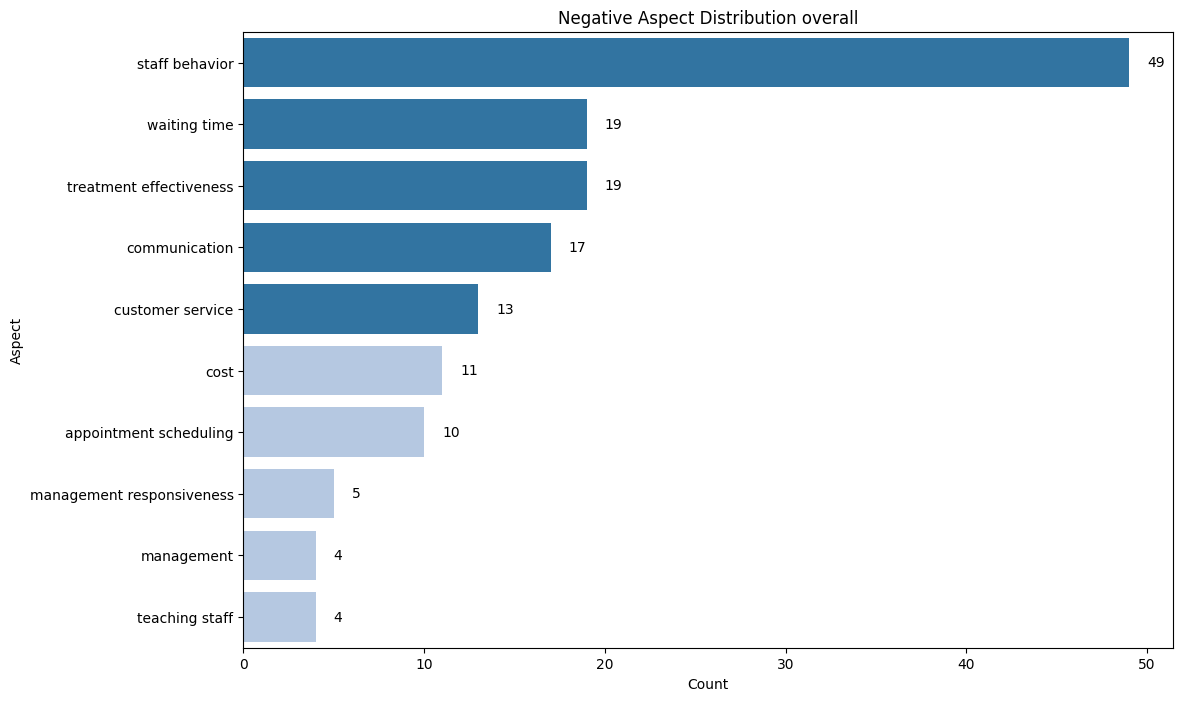

In [57]:
aspect_counts = Counter()
for info in negative_sentiment_info_df:
    aspects = info['aspects']
    for aspect in aspects:
        aspect_counts[aspect] += 1

# Get the top 10 most common aspects
top_10_aspects_overall = aspect_counts.most_common(10)

# Print the top 10 aspects and their counts
for aspect, count in top_10_aspects_overall:
    print(f"Aspect: {aspect}, Count: {count}")




# Create a DataFrame from the top 10 aspects
df_negative_overall = pd.DataFrame(top_10_aspects_overall, columns=['Aspect', 'Count'])

colors = sns.color_palette(['#1f77b4'] + ['#1f77b4']*4 + ['#aec7e8']*5)

# Horizontal bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Aspect', data=df_negative_overall, palette=colors)
plt.xlabel('Count')
plt.ylabel('Aspect')
plt.title('Negative Aspect Distribution overall')

# Add counts on the right side of each bar
for index, value in enumerate(df_negative_overall['Count']):
    plt.text(value + 1, index, str(value), ha='left', va='center')

plt.show()

Now you can see we have only two major places!

## Now we will split this top_two_places dataset w.r.t Positive and negative sentiments:

In [17]:
positive_top_two_places_df= top_two_places[(top_two_places['overall_sentiment'] == 'Very Positive') | (top_two_places['overall_sentiment'] == 'Positive' )]

In [18]:
positive_top_two_places_df['overall_sentiment'].value_counts()

overall_sentiment
Very Positive    197
Positive          18
Name: count, dtype: int64

##### Now exploring key aspects of places with positive reviews: 

In [19]:
positive_top_two_places_df['aspects']

0      {'staff behavior': {'Sentiment': 'Positive', '...
1      {'staff behavior': {'Sentiment': 'Very Positiv...
2      {'staff behavior': {'Sentiment': 'Very Positiv...
3      {'cleanliness': {'Sentiment': 'Positive', 'Sco...
4      {'staff behavior': {'Sentiment': 'Very Positiv...
                             ...                        
321    {'staff behavior': {'Sentiment': 'Very Positiv...
323    {'cleanliness': {'Sentiment': 'Positive', 'Sco...
324    {'doctor': {'Sentiment': 'Very Positive', 'Sco...
325    {'doctor': {'Sentiment': 'Very Positive', 'Sco...
326    {'staff behavior': {'Sentiment': 'Very Positiv...
Name: aspects, Length: 215, dtype: object

to get the aspect:

In [20]:
import json
positive_top_two_places_df.loc[:, 'sentiment_info_json'] = positive_top_two_places_df['sentiment_info'].apply(lambda x: json.loads(x))




C:\Users\DELL\AppData\Local\Temp\ipykernel_19660\2367406492.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_top_two_places_df.loc[:, 'sentiment_info_json'] = positive_top_two_places_df['sentiment_info'].apply(lambda x: json.loads(x))


In [21]:
sentiment_info= positive_top_two_places_df['sentiment_info_json']
sentiment_info[1]

{'overall': {'Overall Sentiment': 'Very Positive', 'Overall Score': 90},
 'aspects': {'staff behavior': {'Sentiment': 'Very Positive', 'Score': 95},
  'treatment effectiveness': {'Sentiment': 'Positive', 'Score': 80},
  'waiting time': {'Sentiment': 'Very Positive', 'Score': 90}}}

In [108]:
from collections import Counter
aspect_counts = Counter()
for info in sentiment_info:
    aspects = info['aspects']
    for aspect in aspects:
        aspect_counts[aspect] += 1

# Get the top 10 most common aspects
top_10_aspects = aspect_counts.most_common(10)

# Print the top 10 aspects and their counts
for aspect, count in top_10_aspects:
    print(f"Aspect: {aspect}, Count: {count}")


Aspect: staff behavior, Count: 153
Aspect: treatment effectiveness, Count: 100
Aspect: doctor, Count: 23
Aspect: doctor's skill, Count: 17
Aspect: professionalism, Count: 16
Aspect: cleanliness, Count: 14
Aspect: waiting time, Count: 9
Aspect: service quality, Count: 8
Aspect: doctor's behavior, Count: 6
Aspect: cost, Count: 5


C:\Users\DELL\AppData\Local\Temp\ipykernel_19660\1286603701.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Aspect', data=df, palette=colors)


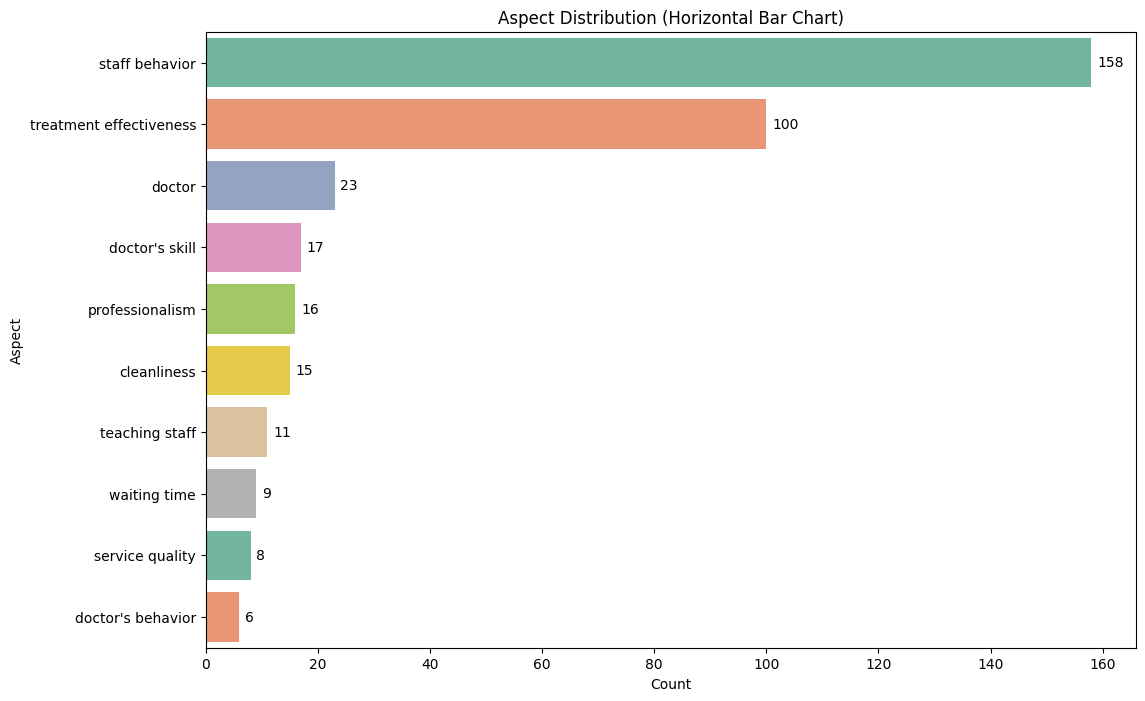

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Create a DataFrame from the top 10 aspects
df = pd.DataFrame(top_10_aspects, columns=['Aspect', 'Count'])

# Define a color palette
colors = sns.color_palette('Set2', n_colors=len(df))

# Horizontal bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Aspect', data=df, palette=colors)
plt.xlabel('Count')
plt.ylabel('Aspect')
plt.title('Aspect Distribution (Horizontal Bar Chart)')

# Add counts on the right side of each bar
for index, value in enumerate(df['Count']):
    plt.text(value + 1, index, str(value), ha='left', va='center')

plt.show()

In [110]:
from collections import Counter
aspect_counts = Counter()
for info in sentiment_info:
    aspects = info['aspects']
    for aspect in aspects:
        aspect_counts[aspect] += 1

# Get the top 10 most common aspects
top_10_aspects = aspect_counts.most_common(10)

# Print the top 10 aspects and their counts
for aspect, count in top_10_aspects:
    print(f"Aspect: {aspect}, Count: {count}")


Aspect: staff behavior, Count: 153
Aspect: treatment effectiveness, Count: 100
Aspect: doctor, Count: 23
Aspect: doctor's skill, Count: 17
Aspect: professionalism, Count: 16
Aspect: cleanliness, Count: 14
Aspect: waiting time, Count: 9
Aspect: service quality, Count: 8
Aspect: doctor's behavior, Count: 6
Aspect: cost, Count: 5


### Now considering top 10 negative aspects of top 2 most reveiwed locations:

In [111]:
negative_top_two_places_df= top_two_places[(top_two_places['overall_sentiment'] == 'Very Negative') | (top_two_places['overall_sentiment'] == 'Negative' )]

In [112]:
negative_top_two_places_df['overall_sentiment'].value_counts()

overall_sentiment
Very Negative    54
Negative         34
Name: count, dtype: int64

In [113]:
import json
negative_top_two_places_df.loc[:, 'sentiment_info_json'] = negative_top_two_places_df['sentiment_info'].apply(lambda x: json.loads(x))




C:\Users\DELL\AppData\Local\Temp\ipykernel_2268\3633834161.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_top_two_places_df.loc[:, 'sentiment_info_json'] = negative_top_two_places_df['sentiment_info'].apply(lambda x: json.loads(x))


In [114]:
negative_sentiment_info= negative_top_two_places_df['sentiment_info_json']


C:\Users\DELL\AppData\Local\Temp\ipykernel_2268\3779666764.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Aspect', data=df, palette=colors)


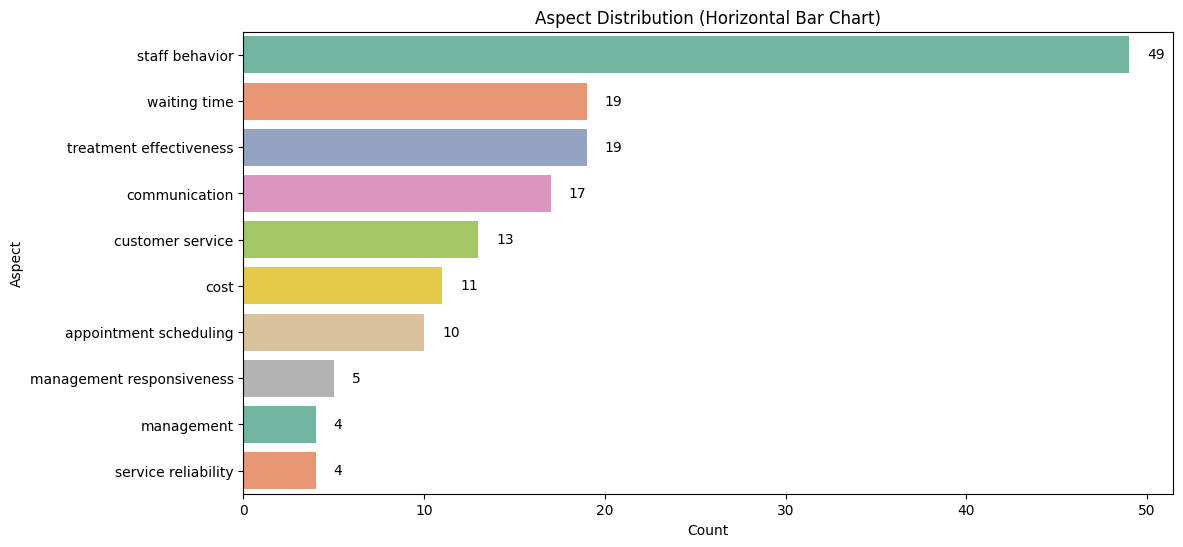

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

aspect_counts = Counter()

for info in negative_sentiment_info:
    aspects = info['aspects']
    for aspect in aspects:
        aspect_counts[aspect] += 1

# Get the top 10 most common aspects
top_10_aspects = aspect_counts.most_common(10)

# Create a DataFrame from the top 10 aspects
df = pd.DataFrame(top_10_aspects, columns=['Aspect', 'Count'])

# Define a color palette
colors = sns.color_palette('Set2', n_colors=len(df))

# Create the horizontal bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Aspect', data=df, palette=colors)
plt.xlabel('Count')
plt.ylabel('Aspect')
plt.title('Aspect Distribution (Horizontal Bar Chart)')

# Add counts on the right side of each bar
for index, value in enumerate(df['Count']):
    plt.text(value + 1, index, str(value), ha='left', va='center')

plt.show()


In [120]:
new= pd.read_excel('result_v2.xlsx')

In [121]:
result = new.groupby('type')[['overall_score', 'rating']].mean()
result

,overall_score,rating
type,,
Dental clinic,58.948498,3.700000
Elementary school,61.923077,3.700000
Laboratory,70.000000,4.000000
Library,90.000000,3.700000
Medical Center,-19.729730,3.900000
Mosque,43.333333,4.133333
Primary school,-9.000000,3.300000
School,95.000000,4.800000
University,22.000000,4.400000


In [122]:
correlation = new['overall_score'].corr(new['rating'])
print("Correlation coefficient between overall_score and rating:", correlation)

Correlation coefficient between overall_score and rating: -0.201933518242674


In [125]:
new['name'].value_counts()

name
عيادات المسواك الطبية                                 233
Davinci clinics                                        74
Ziad Bin Saad Primary School                           13
جامعه الملك سعود                                        5
مدرسة 379                                               5
Abdullah Alinviei Mosque                                2
Saudi Digital Library                                   2
مسجد                                                    1
Australian Laboratory Services (ALS) Arabia Riyadh      1
روضة العلوم KACST Kindergarten                          1
Name: count, dtype: int64

# Dental hospital positive and negative aspects:

In [184]:
#making new df with only dental hospital records
dental_hospital_df= new[(new['name'] == 'عيادات المسواك الطبية')]

dental_hospital_df['name'].value_counts()

name
عيادات المسواك الطبية    233
Name: count, dtype: int64

Positive reviews of Dental hospital:

In [185]:
positive_reviews_of_dental_hospital= dental_hospital_df[(dental_hospital_df['overall_sentiment'] == 'Very Positive') | (dental_hospital_df['overall_sentiment'] == 'Positive' )]


positive_reviews_of_dental_hospital['overall_sentiment'].value_counts()

overall_sentiment
Very Positive    173
Positive          16
Name: count, dtype: int64

In [186]:
import json
positive_reviews_of_dental_hospital.loc[:, 'sentiment_info_json'] = positive_reviews_of_dental_hospital['sentiment_info'].apply(lambda x: json.loads(x))




C:\Users\DELL\AppData\Local\Temp\ipykernel_2268\3388234803.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_reviews_of_dental_hospital.loc[:, 'sentiment_info_json'] = positive_reviews_of_dental_hospital['sentiment_info'].apply(lambda x: json.loads(x))


In [187]:
sentiment_info_of_positive_reviews_of_dental_hospital= positive_reviews_of_dental_hospital['sentiment_info_json']


In [188]:
from collections import Counter
aspect_counts = Counter()
for info in sentiment_info_of_positive_reviews_of_dental_hospital:
    aspects = info['aspects']
    for aspect in aspects:
        aspect_counts[aspect] += 1

# Get the top 10 most common aspects
top_10_positive_aspects_of_dental_hospital = aspect_counts.most_common(10)

# Print the top 10 aspects and their counts
for aspect, count in top_10_positive_aspects_of_dental_hospital:
    print(f"Aspect: {aspect}, Count: {count}")


Aspect: staff behavior, Count: 133
Aspect: treatment effectiveness, Count: 85
Aspect: doctor, Count: 20
Aspect: doctor's skill, Count: 13
Aspect: professionalism, Count: 13
Aspect: cleanliness, Count: 11
Aspect: waiting time, Count: 7
Aspect: service quality, Count: 6
Aspect: staff, Count: 5
Aspect: staff_behavior, Count: 5


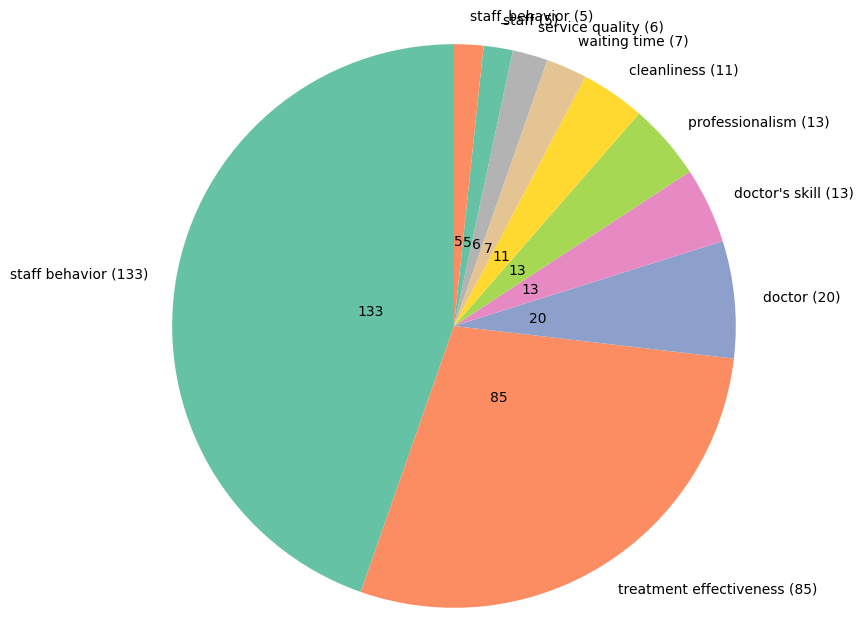

In [190]:


# Create a DataFrame from the top 10 aspects
df = pd.DataFrame(top_10_positive_aspects_of_dental_hospital, columns=['Aspect', 'Count'])

# Define a color palette
colors = sns.color_palette('Set2', n_colors=len(df))

# Create a pie chart with count values
plt.figure(figsize=(8, 8))
patches, texts = plt.pie(df['Count'], labels=[f"{aspect} ({count})" for aspect, count in zip(df['Aspect'], df['Count'])], colors=colors, startangle=90)
plt.axis('equal')

# Add count values on each segment
for i, (aspect, count) in enumerate(zip(df['Aspect'], df['Count'])):
    angle = (patches[i].theta2 + patches[i].theta1) / 2
    x = patches[i].center[0] + 0.3 * np.cos(np.deg2rad(angle))
    y = patches[i].center[1] + 0.3 * np.sin(np.deg2rad(angle))
    plt.text(x, y, str(count), color='black', va='center', ha='center')

plt.show()


#### now negative things of this dental hospital

In [137]:
negative_reviews_of_dental_hospital= dental_hospital_df[(dental_hospital_df['overall_sentiment'] == 'Very Negative') | (dental_hospital_df['overall_sentiment'] == 'Negative' )]


negative_reviews_of_dental_hospital['overall_sentiment'].value_counts()

overall_sentiment
Very Negative    27
Negative         15
Name: count, dtype: int64

In [141]:
import json
negative_reviews_of_dental_hospital.loc[:, 'sentiment_info_json'] = negative_reviews_of_dental_hospital['sentiment_info'].apply(lambda x: json.loads(x))



In [142]:
sentiment_info_of_negative_reviews_of_dental_hospital= negative_reviews_of_dental_hospital['sentiment_info_json']


In [143]:
from collections import Counter
aspect_counts = Counter()
for info in sentiment_info_of_negative_reviews_of_dental_hospital:
    aspects = info['aspects']
    for aspect in aspects:
        aspect_counts[aspect] += 1

top_10_negative_aspects_of_dental_hospital = aspect_counts.most_common(10)

for aspect, count in top_10_negative_aspects_of_dental_hospital:
    print(f"Aspect: {aspect}, Count: {count}")


Aspect: staff behavior, Count: 28
Aspect: treatment effectiveness, Count: 12
Aspect: waiting time, Count: 10
Aspect: cost, Count: 9
Aspect: management responsiveness, Count: 3
Aspect: customer service, Count: 3
Aspect: reputation, Count: 3
Aspect: professionalism, Count: 2
Aspect: staff, Count: 2
Aspect: appointment scheduling, Count: 2


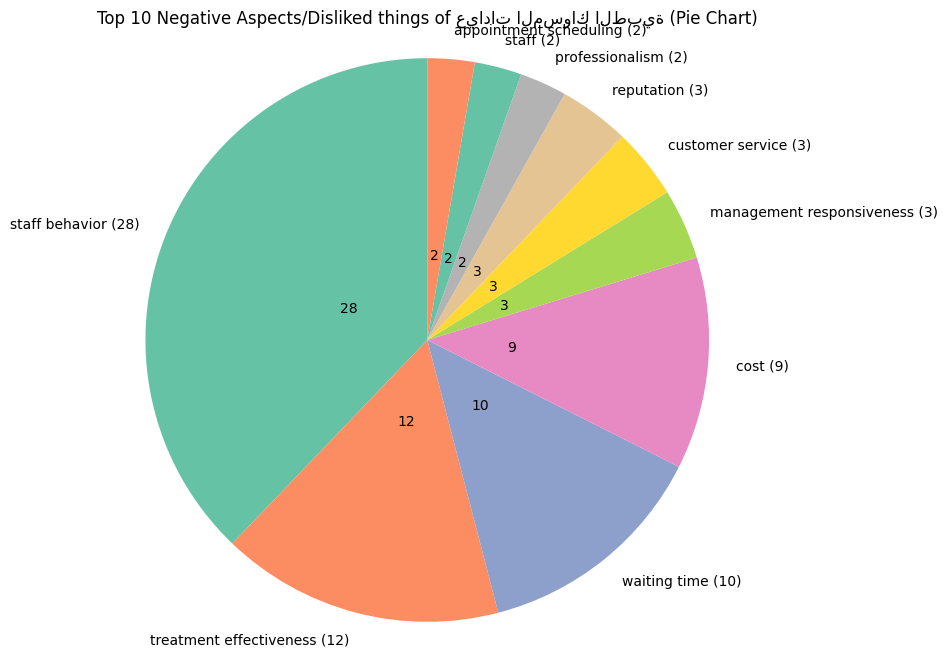

In [183]:


neg_df = pd.DataFrame(top_10_negative_aspects_of_dental_hospital, columns=['Aspect', 'Count'])

# Define a color palette
colors = sns.color_palette('Set2', n_colors=len(df))

# Horizontal bar chart
# Create a pie chart with count values
plt.figure(figsize=(8, 8))
patches, texts = plt.pie(neg_df['Count'], labels=[f"{aspect} ({count})" for aspect, count in zip(neg_df['Aspect'], neg_df['Count'])], colors=colors, startangle=90)
plt.title('Top 10 Negative Aspects/Disliked things of عيادات المسواك الطبية (Pie Chart)')
plt.axis('equal')

# Add count values on each segment
for i, (aspect, count) in enumerate(zip(neg_df['Aspect'], neg_df['Count'])):
    angle = (patches[i].theta2 + patches[i].theta1) / 2
    x = patches[i].center[0] + 0.3 * np.cos(np.deg2rad(angle))
    y = patches[i].center[1] + 0.3 * np.sin(np.deg2rad(angle))
    plt.text(x, y, str(count), color='black', va='center', ha='center')

plt.show()


# Positive and Negative Aspects of Devici Clinics:

In [177]:
davinci_df= new[(new['name'] == 'Davinci clinics')]

davinci_df['name'].value_counts()

name
Davinci clinics    74
Name: count, dtype: int64

In [178]:
positive_reviews_of_davinci= davinci_df[(davinci_df['overall_sentiment'] == 'Very Positive') | (davinci_df['overall_sentiment'] == 'Positive' )]

negative_reviews_of_davinci= davinci_df[(davinci_df['overall_sentiment'] == 'Very Negative') | (davinci_df['overall_sentiment'] == 'Negative' )]



In [179]:
positive_reviews_of_davinci.loc[:, 'sentiment_info_json'] = positive_reviews_of_davinci['sentiment_info'].apply(lambda x: json.loads(x))

negative_reviews_of_davinci.loc[:, 'sentiment_info_json'] = negative_reviews_of_davinci['sentiment_info'].apply(lambda x: json.loads(x))


C:\Users\DELL\AppData\Local\Temp\ipykernel_2268\2201160098.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_reviews_of_davinci.loc[:, 'sentiment_info_json'] = positive_reviews_of_davinci['sentiment_info'].apply(lambda x: json.loads(x))
C:\Users\DELL\AppData\Local\Temp\ipykernel_2268\2201160098.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_reviews_of_davinci.loc[:, 'sentiment_info_json'] = negative_reviews_of_davinci['sentiment_info'].apply(lambda x: json.loads(x))


In [180]:
sentiment_info_of_positive_reviews_of_davinci= positive_reviews_of_davinci['sentiment_info_json']

sentiment_info_of_negative_reviews_of_davinci= negative_reviews_of_davinci['sentiment_info_json']


Aspect: staff behavior, Count: 20
Aspect: treatment effectiveness, Count: 15
Aspect: doctor's skill, Count: 4
Aspect: cleanliness, Count: 3
Aspect: professionalism, Count: 3
Aspect: doctor, Count: 3
Aspect: waiting time, Count: 2
Aspect: specific staff, Count: 2
Aspect: service quality, Count: 2
Aspect: customer service, Count: 1


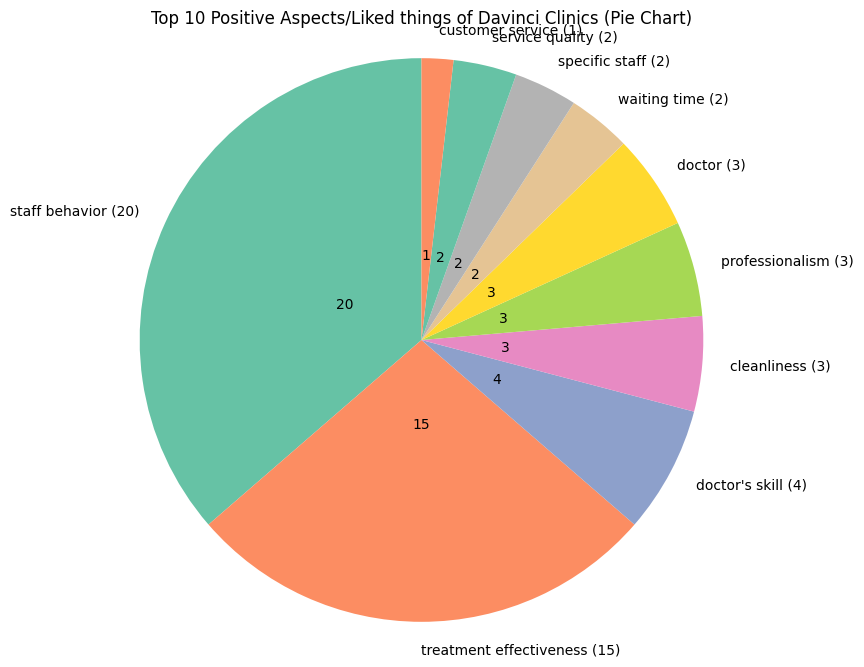

In [181]:
from collections import Counter
aspect_counts = Counter()
for info in sentiment_info_of_positive_reviews_of_davinci:
    aspects = info['aspects']
    for aspect in aspects:
        aspect_counts[aspect] += 1

top_10_positive_aspects_of_davinci_hospital = aspect_counts.most_common(10)

# Print the top 10 aspects and their counts
for aspect, count in top_10_positive_aspects_of_davinci_hospital:
    print(f"Aspect: {aspect}, Count: {count}")




# Create a DataFrame from the top 10 aspects
df = pd.DataFrame(top_10_positive_aspects_of_davinci_hospital, columns=['Aspect', 'Count'])

# Define a color palette
colors = sns.color_palette('Set2', n_colors=len(df))

# Create a pie chart with count values
plt.figure(figsize=(8, 8))
patches, texts = plt.pie(df['Count'], labels=[f"{aspect} ({count})" for aspect, count in zip(df['Aspect'], df['Count'])], colors=colors, startangle=90)
plt.title('Top 10 Positive Aspects/Liked things of Davinci Clinics (Pie Chart)')
plt.axis('equal')

# Add count values on each segment
for i, (aspect, count) in enumerate(zip(df['Aspect'], df['Count'])):
    angle = (patches[i].theta2 + patches[i].theta1) / 2
    x = patches[i].center[0] + 0.3 * np.cos(np.deg2rad(angle))
    y = patches[i].center[1] + 0.3 * np.sin(np.deg2rad(angle))
    plt.text(x, y, str(count), color='black', va='center', ha='center')

plt.show()


Aspect: staff behavior, Count: 21
Aspect: communication, Count: 15
Aspect: customer service, Count: 10
Aspect: waiting time, Count: 9
Aspect: appointment scheduling, Count: 8
Aspect: treatment effectiveness, Count: 7
Aspect: service reliability, Count: 4
Aspect: maintenance, Count: 3
Aspect: refund process, Count: 2
Aspect: financial transparency, Count: 2


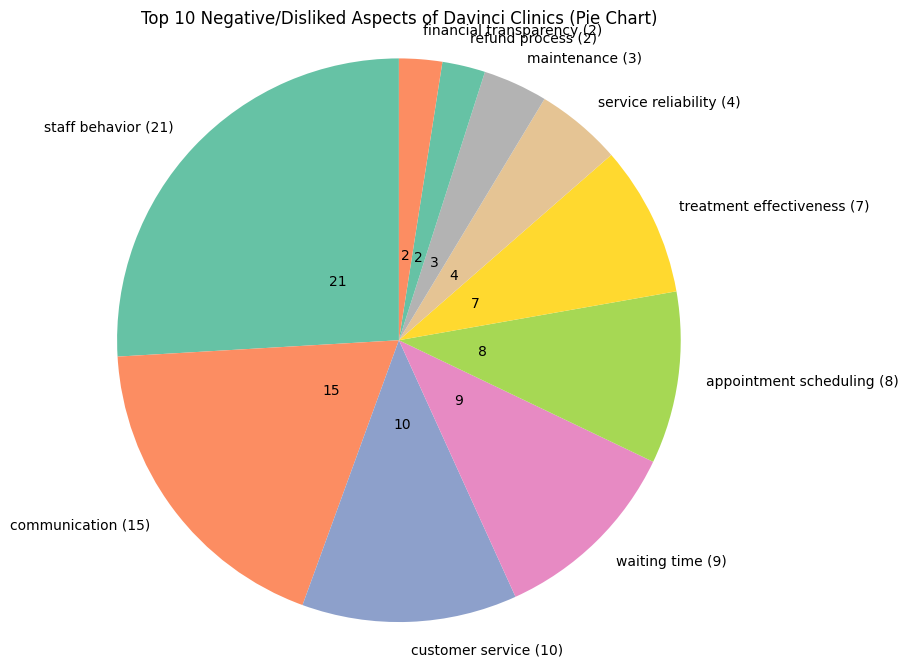

In [182]:
from collections import Counter
aspect_counts = Counter()
for info in sentiment_info_of_negative_reviews_of_davinci:
    aspects = info['aspects']
    for aspect in aspects:
        aspect_counts[aspect] += 1

top_10_negative_aspects_of_davinci_hospital = aspect_counts.most_common(10)

# Print the top 10 aspects and their counts
for aspect, count in top_10_negative_aspects_of_davinci_hospital:
    print(f"Aspect: {aspect}, Count: {count}")




# Create a DataFrame from the top 10 aspects
df = pd.DataFrame(top_10_negative_aspects_of_davinci_hospital, columns=['Aspect', 'Count'])

# Define a color palette
colors = sns.color_palette('Set2', n_colors=len(df))
# Create a pie chart with count values
plt.figure(figsize=(8, 8))
patches, texts = plt.pie(df['Count'], labels=[f"{aspect} ({count})" for aspect, count in zip(df['Aspect'], df['Count'])], colors=colors, startangle=90)
plt.title('Top 10 Negative/Disliked Aspects of Davinci Clinics (Pie Chart)')
plt.axis('equal')

# Add count values on each segment
for i, (aspect, count) in enumerate(zip(df['Aspect'], df['Count'])):
    angle = (patches[i].theta2 + patches[i].theta1) / 2
    x = patches[i].center[0] + 0.3 * np.cos(np.deg2rad(angle))
    y = patches[i].center[1] + 0.3 * np.sin(np.deg2rad(angle))
    plt.text(x, y, str(count), color='black', va='center', ha='center')

plt.show()

plt.show()

# Positive ande Negative aspects of Ziad Bin Saad Primary School :"

In [172]:
ziad_primary = new[(new['name'] == 'Ziad Bin Saad Primary School')]

ziad_primary['name'].value_counts()

name
Ziad Bin Saad Primary School    13
Name: count, dtype: int64

In [173]:
positive_reviews_of_ziad_primary= ziad_primary[(ziad_primary['overall_sentiment'] == 'Very Positive') | (ziad_primary['overall_sentiment'] == 'Positive' )]

negative_reviews_of_ziad_primary= ziad_primary[(ziad_primary['overall_sentiment'] == 'Very Negative') | (ziad_primary['overall_sentiment'] == 'Negative' )]



positive_reviews_of_ziad_primary.loc[:, 'sentiment_info_json'] = positive_reviews_of_ziad_primary['sentiment_info'].apply(lambda x: json.loads(x))

negative_reviews_of_ziad_primary.loc[:, 'sentiment_info_json'] = negative_reviews_of_ziad_primary['sentiment_info'].apply(lambda x: json.loads(x))


sentiment_info_of_positive_reviews_of_ziad= positive_reviews_of_ziad_primary['sentiment_info_json']

sentiment_info_of_negative_reviews_of_ziad= negative_reviews_of_ziad_primary['sentiment_info_json']




C:\Users\DELL\AppData\Local\Temp\ipykernel_2268\2831725586.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_reviews_of_ziad_primary.loc[:, 'sentiment_info_json'] = positive_reviews_of_ziad_primary['sentiment_info'].apply(lambda x: json.loads(x))
C:\Users\DELL\AppData\Local\Temp\ipykernel_2268\2831725586.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_reviews_of_ziad_primary.loc[:, 'sentiment_info_json'] = negative_reviews_of_ziad_primary['sentiment_info'].apply(lambda x: json.loads(

Aspect: teaching staff, Count: 9
Aspect: staff behavior, Count: 4
Aspect: administration, Count: 2
Aspect: cleanliness, Count: 1
Aspect: bathroom cleanliness, Count: 1
Aspect: school administration, Count: 1
Aspect: class size, Count: 1
Aspect: efforts of specific teacher (Omar Al-Haqbani), Count: 1
Aspect: care and attention, Count: 1
Aspect: student-teacher relationship, Count: 1


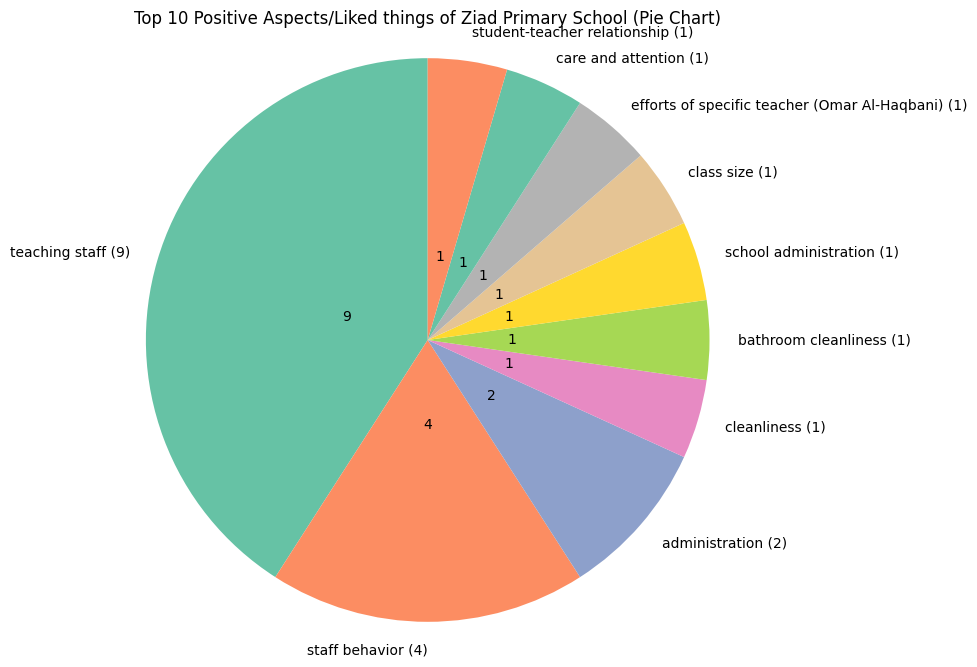

In [174]:
from collections import Counter
aspect_counts = Counter()
for info in sentiment_info_of_positive_reviews_of_ziad:
    aspects = info['aspects']
    for aspect in aspects:
        aspect_counts[aspect] += 1

top_10_positive_aspects_of_ziad = aspect_counts.most_common(10)

# Print the top 10 aspects and their counts
for aspect, count in top_10_positive_aspects_of_ziad:
    print(f"Aspect: {aspect}, Count: {count}")




# Create a DataFrame from the top 10 aspects
df = pd.DataFrame(top_10_positive_aspects_of_ziad, columns=['Aspect', 'Count'])

# Define a color palette
colors = sns.color_palette('Set2', n_colors=len(df))

# Create a pie chart with count values
plt.figure(figsize=(8, 8))
patches, texts = plt.pie(df['Count'], labels=[f"{aspect} ({count})" for aspect, count in zip(df['Aspect'], df['Count'])], colors=colors, startangle=90)
plt.title('Top 10 Positive Aspects/Liked things of Ziad Primary School (Pie Chart)')
plt.axis('equal')

# Add count values on each segment
for i, (aspect, count) in enumerate(zip(df['Aspect'], df['Count'])):
    angle = (patches[i].theta2 + patches[i].theta1) / 2
    x = patches[i].center[0] + 0.3 * np.cos(np.deg2rad(angle))
    y = patches[i].center[1] + 0.3 * np.sin(np.deg2rad(angle))
    plt.text(x, y, str(count), color='black', va='center', ha='center')

plt.show()


Aspect: teaching staff, Count: 1
Aspect: school leadership, Count: 1
Aspect: safety, Count: 1
Aspect: bullying, Count: 1
Aspect: teacher and student relationship, Count: 1


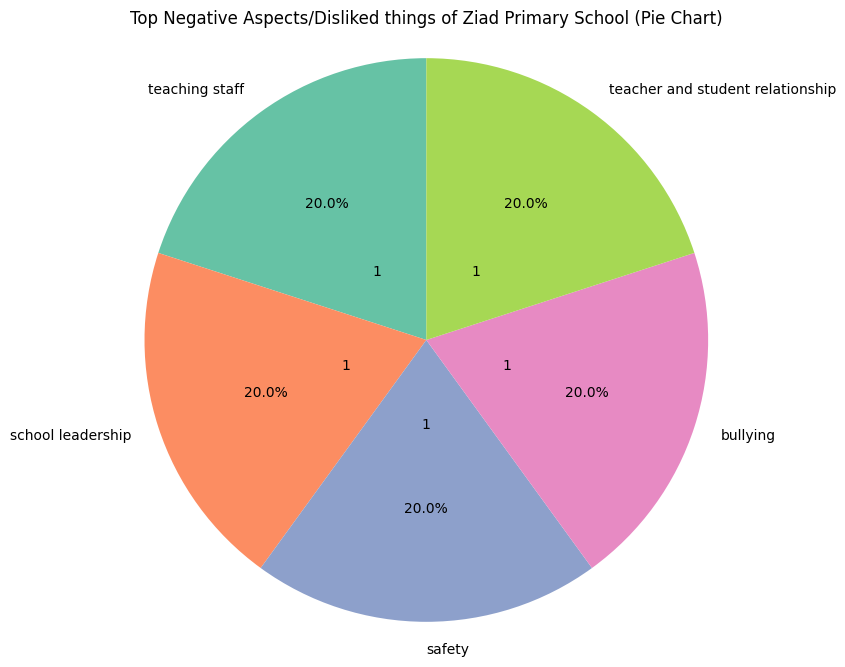

In [175]:
from collections import Counter
aspect_counts = Counter()
for info in sentiment_info_of_negative_reviews_of_ziad:
    aspects = info['aspects']
    for aspect in aspects:
        aspect_counts[aspect] += 1

top_10_negative_aspects_of_ziad = aspect_counts.most_common(10)

# Print the top 10 aspects and their counts
for aspect, count in top_10_negative_aspects_of_ziad:
    print(f"Aspect: {aspect}, Count: {count}")

import numpy as npo


# Create a DataFrame from the top 10 aspects
df = pd.DataFrame(top_10_negative_aspects_of_ziad, columns=['Aspect', 'Count'])

# Define a color palette
colors = sns.color_palette('Set2', n_colors=len(df))
# Create a pie chart with count values
# Create a pie chart with count values
# Create a pie chart with count values
plt.figure(figsize=(8, 8))
patches, texts, autotexts = plt.pie(df['Count'], labels=df['Aspect'], colors=colors, startangle=90, autopct='%1.1f%%')
plt.title('Top Negative Aspects/Disliked things of Ziad Primary School (Pie Chart)')
plt.axis('equal')

# Add count values on each segment
for i, (aspect, count) in enumerate(zip(df['Aspect'], df['Count'])):
    angle = (patches[i].theta2 + patches[i].theta1) / 2
    x = patches[i].center[0] + 0.3 * np.cos(np.deg2rad(angle))
    y = patches[i].center[1] + 0.3 * np.sin(np.deg2rad(angle))
    plt.text(x, y, str(count), color='black', va='center', ha='center')

plt.show()

